$n_0$ = 12

r = 2 $\mu m$

Два одинаковых импульса, падающих под углами phi и -phi между нормалью к поверхности мишени и вектороми **k**

Эффективность на джуль падающей энергии ниже, но задача о наклонном падении не оптимизировалась по параметрам.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import struct
from math import floor
import gzip
from scipy.interpolate import griddata
import cmath

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 25

In [3]:
l = subprocess.check_output(['ls',], cwd = r"./data/2D_2pulses_angle/")
path_ends = l.split()
path_ends = sorted([i.decode('ascii') for i in path_ends[:]])
print(path_ends[:])

['real_n_12.000_phi_13.80.dat', 'real_n_12.000_phi_17.10.dat', 'real_n_12.000_phi_20.10.dat', 'real_n_12.000_phi_27.30.dat', 'real_n_12.000_phi_28.50.dat', 'real_n_12.000_phi_33.90.dat', 'real_n_12.000_phi_6.00.dat']


In [4]:
energy_i = 2.0600802417931993e+35

In [5]:
len(path_ends)

7

In [6]:
def read_file(dim2, name_of_file):
    #print(name_of_file)
    with open(name_of_file, "r") as file:
        line = file.read()
        data = line.split("    ")
        dim1 = int((len(data)-1)/(3003))
        omega = np.zeros(dim1)
        lambda_w = np.zeros(dim1)
        rcs = np.zeros((dim1,dim2))
        for i in range(dim1):
            omega[i] = float(data[0+i*(dim2+2)])
            #print(i)
            lambda_w[i] = float(data[1+i*(dim2+2)])
            rcs[i,:] = data[2+i*(dim2+2):(i+1)*(dim2+2)]
    return omega, lambda_w, rcs

In [16]:
energy_n_1 = []
phi_array = []
for i in sorted(path_ends[:]):
    omega_amp, lambda_w_amp, rcs_amp = read_file(3001, r"./data/2D_2pulses_angle/" + i)
    filter_lambda = np.where(lambda_w_amp>3) # 3 microns
    #print(i)
    #print("energy    = " + str((np.sum(rcs_amp[filter_lambda ,:750]) + np.sum(rcs_amp[filter_lambda ,2250:]))/energy_i))
    energy_n_1.append((np.sum(rcs_amp[filter_lambda ,:750]) + np.sum(rcs_amp[filter_lambda ,2250:]))/energy_i)
    phi_array.append(np.pi/float(i[18:-4])/np.pi*180)
energy_n_1 = np.array(energy_n_1)
phi_array = np.array(phi_array)

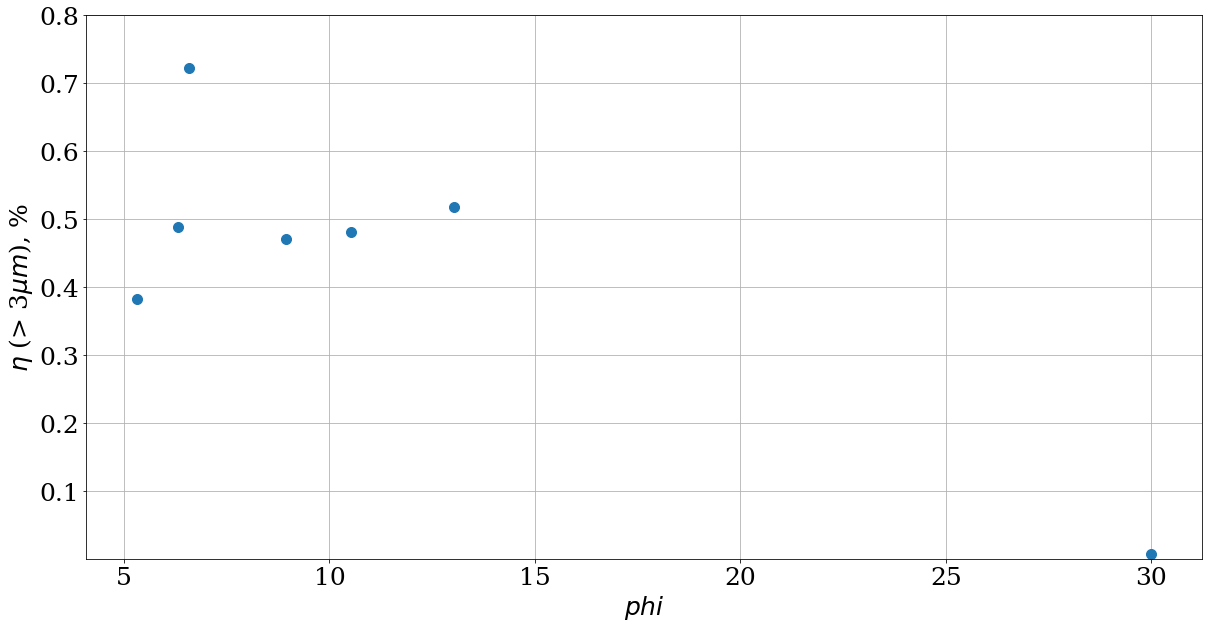

In [20]:
fig = plt.figure(figsize=(20,10))
plt.plot(phi_array,energy_n_1*100, linestyle = "none", marker = ".", markersize = 20)
plt.xlabel(r"$phi$")
plt.ylabel(r"$\eta$ (> 3$\mu m$), %")
plt.xticks((np.arange(5,32,5)))
#plt.yticks(np.arange(0,limit, 0.2))
plt.ylim(1e-3, 0.8)
#plt.xlim(2, 14)
plt.grid()
plt.show()